## Exploratory Data Analysis in the Titanic dataset provided

In [256]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Get the general ideas about the columns

In [257]:
df.shape

(891, 12)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [259]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [260]:
# No. of null values in each column, to be handled in the following
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are quite a lot of missing data in Age and Cabin, which will be checked in detail later.

There are only 2 missing values in Embarked, which is not significant.

In [261]:
# See values in each columns
for series_name, series in df.items():
    # print(series_name)
    # print(series.unique())
    print(series.value_counts()) 
    print("=============================================================")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00

### Check duplicated rows

In [262]:
# Check any duplicated rows
print(df['PassengerId'].duplicated().any())
print(df.duplicated().any())

False
False


### Remove unnecessary columns to reduce dimension

In [263]:
# Check if the column values can be used in analysis
for series_name, series in df.items():
    # print(series_name)
    # print(series.unique())
    print(series.value_counts()) 
    print("=============================================================")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00

In [264]:
# Removed columns which are not useful for analysis
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Handle categories in columns

In [265]:
# Map female to 1, Male to 2
df.Sex = df.Sex.map({'female':1 , 'male':0})

In [266]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Encode Embarked
Embarked_encoder = OneHotEncoder()
Embarked_encoded = Embarked_encoder.fit_transform(df[['Embarked']])
Embarked_encoded = Embarked_encoded.toarray()
Embarked_df = pd.DataFrame(Embarked_encoded, columns=Embarked_encoder.get_feature_names_out())
Embarked_df.head()

# Add Embarked column with encoded Embarked
df = pd.concat([df, Embarked_df], axis=1)

Considered there are only 2 different values in Sex. So I do not apply one hot encoding in Sex.

One hot encoding is applied to Embarked so that it can be trained by machine.

### See distributions in dataset

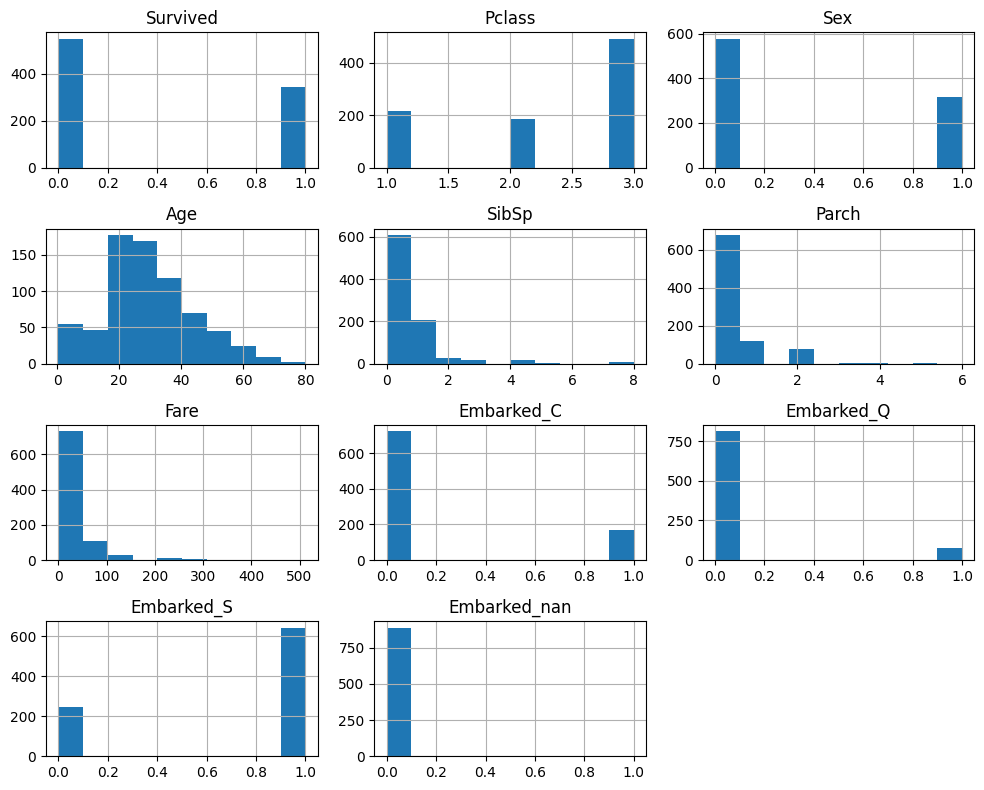

In [267]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Here we can see normal distribution in Age, SibSp, Parch and Fare columns.

### Check missing values

In [268]:
# Checked null values in each column
df.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          2
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Embarked_nan      0
dtype: int64

<Axes: >

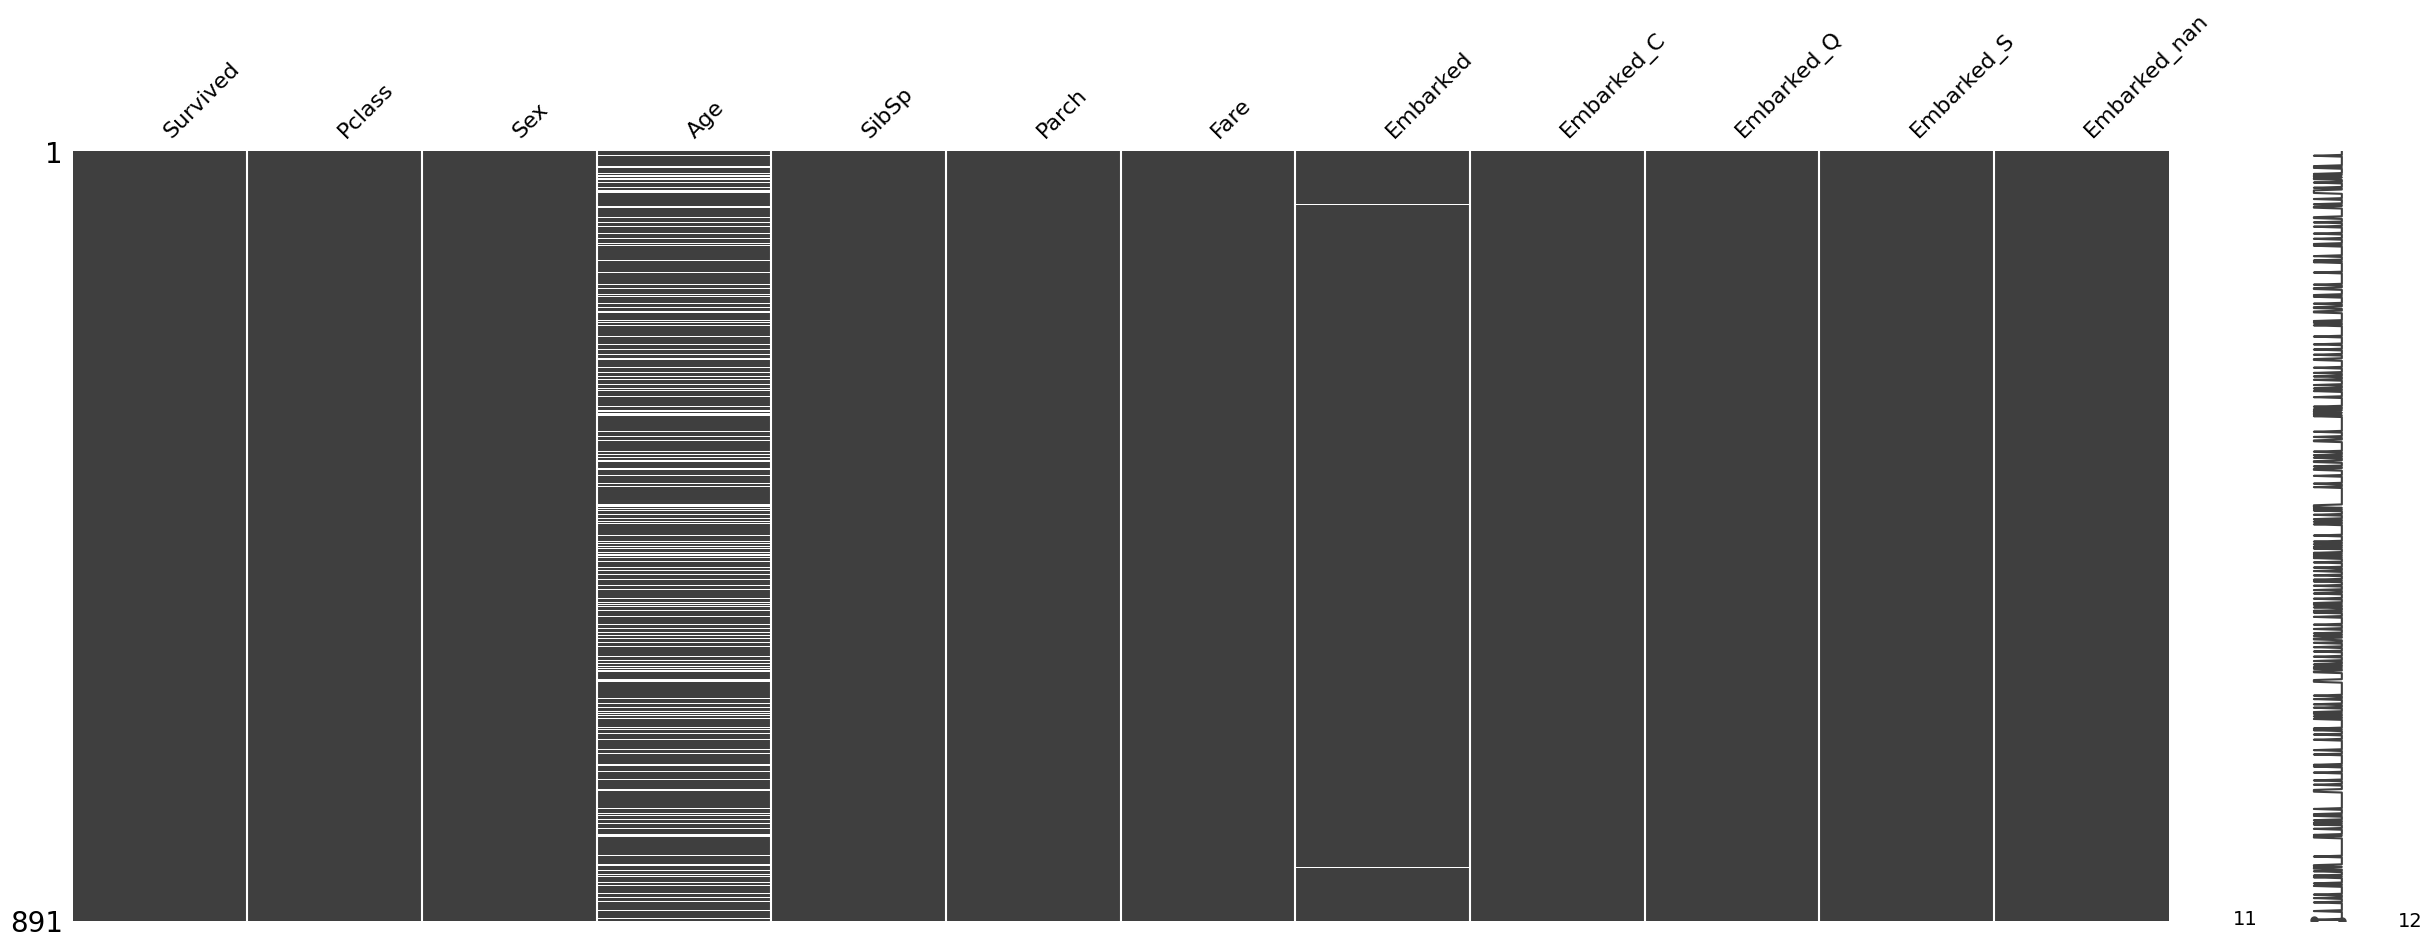

In [269]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

Age has the largest missing values. Try to find the reason in the following.

In [270]:
df_age_missing = df[df['Age'].isnull()]
df_age_missing.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
5,0,3,0,NaN,0,0,8.4583,Q,0.0,1.0,0.0,0.0
17,1,2,0,NaN,0,0,13.0000,S,0.0,0.0,1.0,0.0
19,1,3,1,NaN,0,0,7.2250,C,1.0,0.0,0.0,0.0
26,0,3,0,NaN,0,0,7.2250,C,1.0,0.0,0.0,0.0
28,1,3,1,NaN,0,0,7.8792,Q,0.0,1.0,0.0,0.0
29,0,3,0,NaN,0,0,7.8958,S,0.0,0.0,1.0,0.0
31,1,1,1,NaN,1,0,146.5208,C,1.0,0.0,0.0,0.0
32,1,3,1,NaN,0,0,7.7500,Q,0.0,1.0,0.0,0.0
36,1,3,0,NaN,0,0,7.2292,C,1.0,0.0,0.0,0.0
42,0,3,0,NaN,0,0,7.8958,C,1.0,0.0,0.0,0.0


Distribution in missing age group


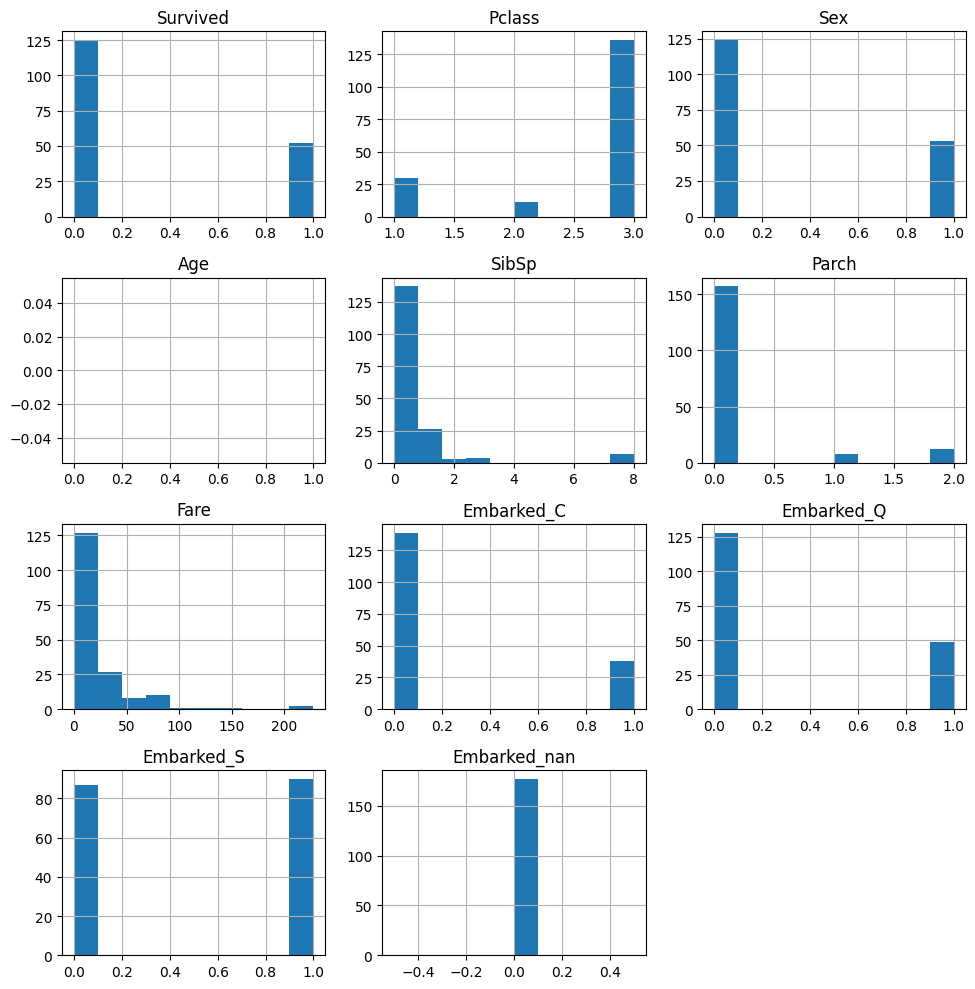

Distribution in general group


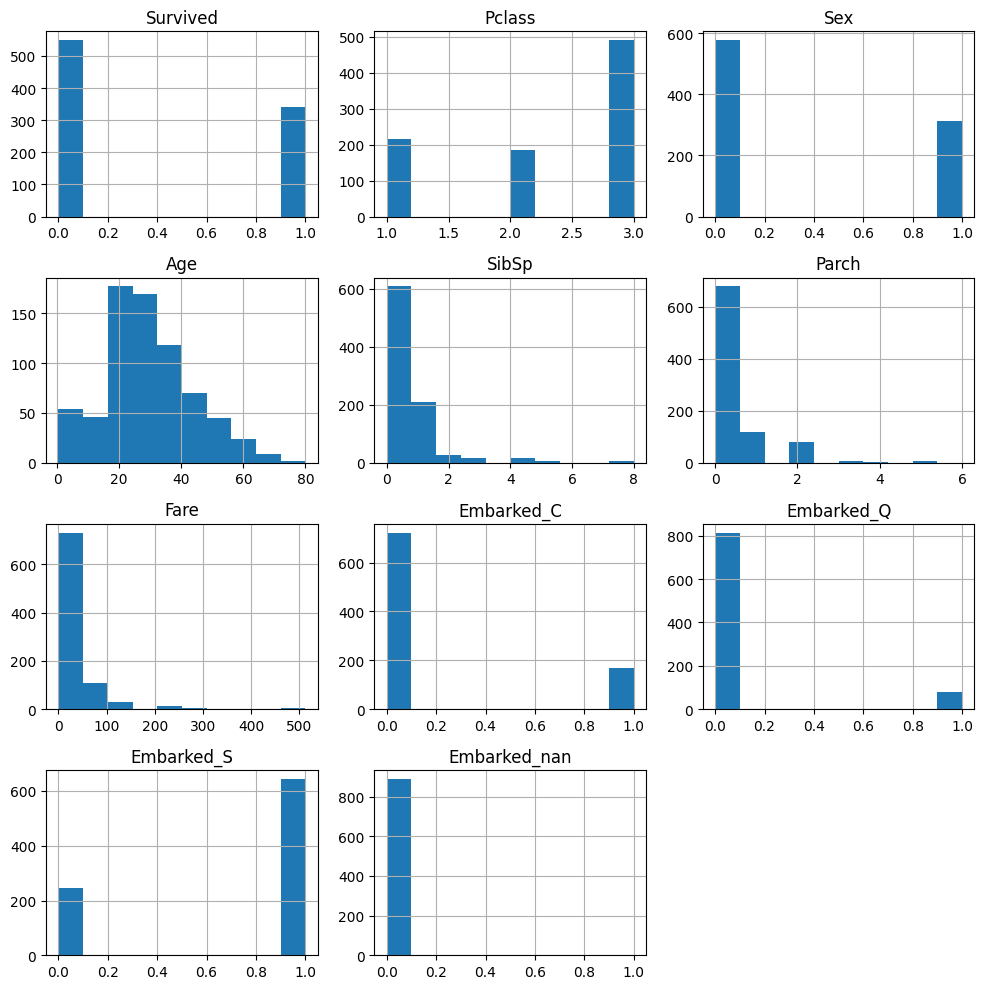

In [271]:
print('Distribution in missing age group')
df_age_missing.hist(figsize=(10, 10))
plt.title('For age missing group')
plt.tight_layout()
plt.show()

print('Distribution in general group')
df.hist(figsize=(10, 10))
plt.title('For general group')
plt.tight_layout()

The distribution in the columns between general and the missing age group is quite similar, only lower ratio of S value in Embarked in age missing group. At this stage, there is no obvious pattern in missing age group. Probably the age could not be found easily, or not recorded well at that time, and is likely missing Completely at Random (MCAR).

### Look for outliners

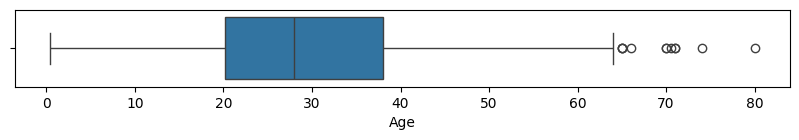

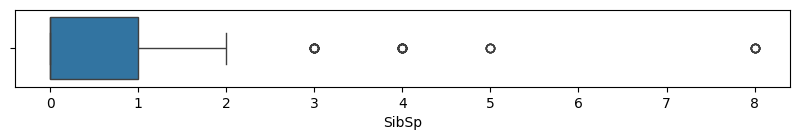

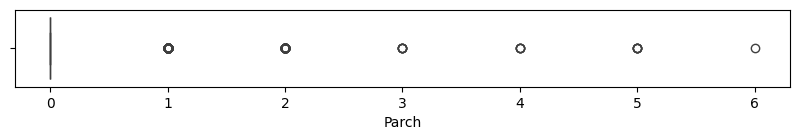

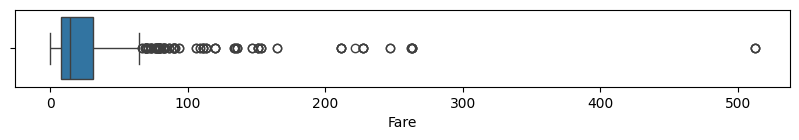

In [272]:
plt.subplots(figsize=(10, 1))
sns.boxplot(x=df.Age)

plt.subplots(figsize=(10, 1))
sns.boxplot(x=df.SibSp)

plt.subplots(figsize=(10, 1))
sns.boxplot(x=df.Parch)

plt.subplots(figsize=(10, 1))
sns.boxplot(x=df.Fare)

plt.show()


There are outliners in Age, SibSp, Parch and Fare. We may handle it for training later.

### See correlations in dataset

<Axes: >

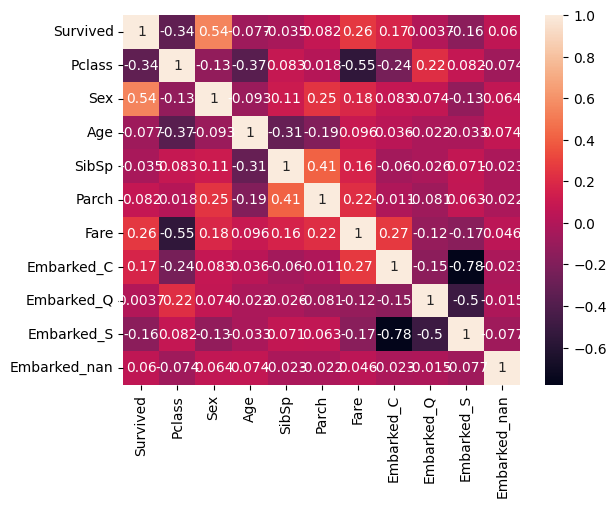

In [273]:
df.head()

df_corr = df.drop('Embarked', axis=1)
sns.heatmap(df_corr.corr(), annot=True) 

From the heat map above, Sex has the highest correlation with Survival.

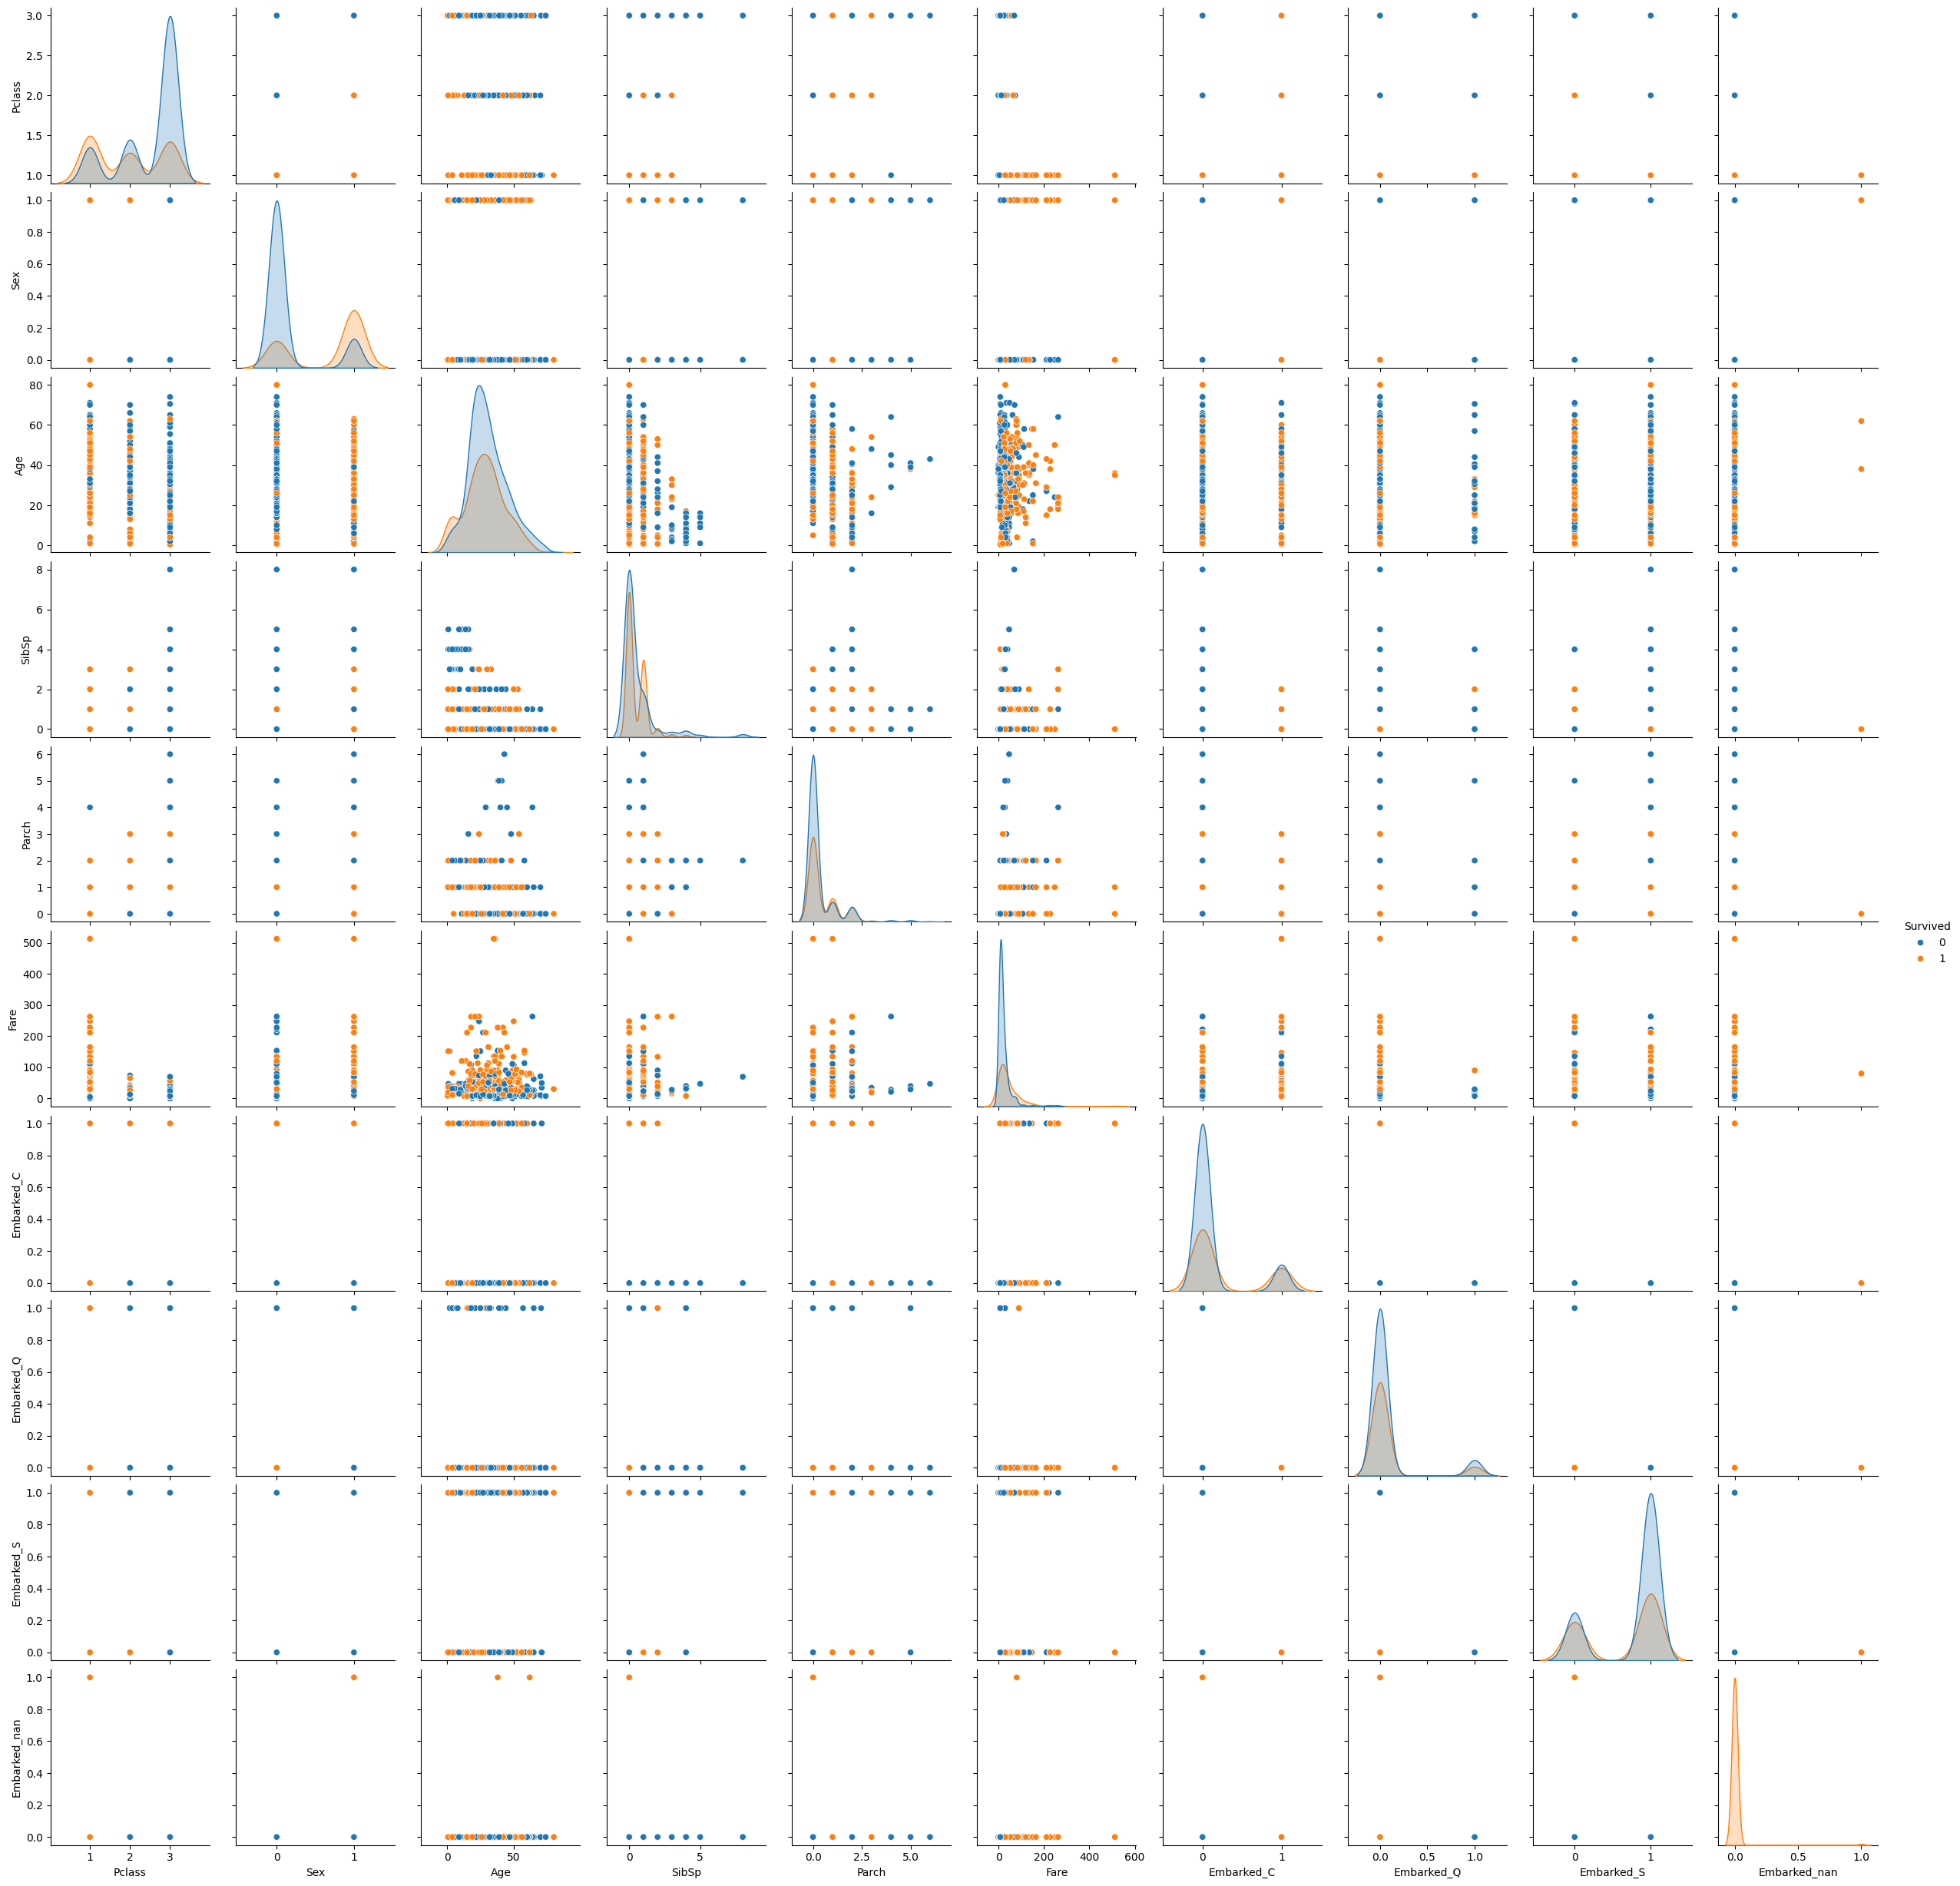

In [274]:
sns.pairplot(df_corr, hue="Survived")

The heatmap does not help much on category data. Will look at the distribution for each columns. Only finds 
- Tickets fare usually higher with Pclass, which makes sense.
- Embarked Q has usually low ticket fares.

### Look in each column in detail

#### Column: Survival
General survival rate is around 38%.

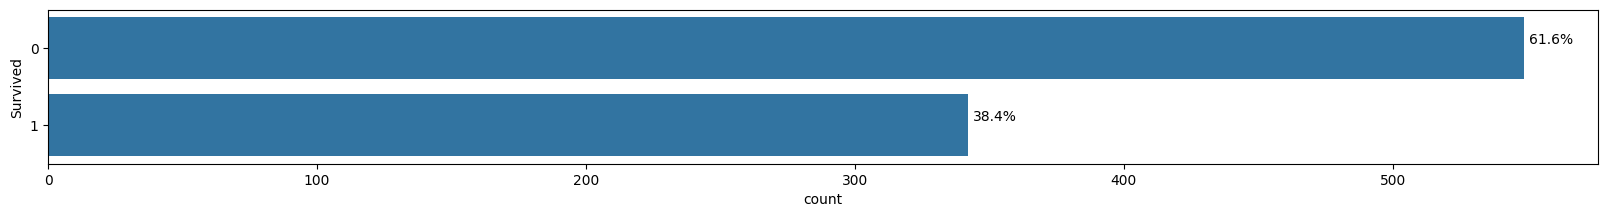

In [275]:
fig = plt.figure(figsize=(20,2))
ax = sns.countplot(y='Survived', data=df);
total = len(df)

# Display percentage in plot
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%\n'
    x = p.get_x() + p.get_width() + 10
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center', va='center')

#### Column: Pclass

Pclass 1 has higher survival rate, then Pclass 2, and Pclass 3.

Pclass 1, 2 have higher survival rate than that of general, so Pclass 3 has lower survival rate than that of general.

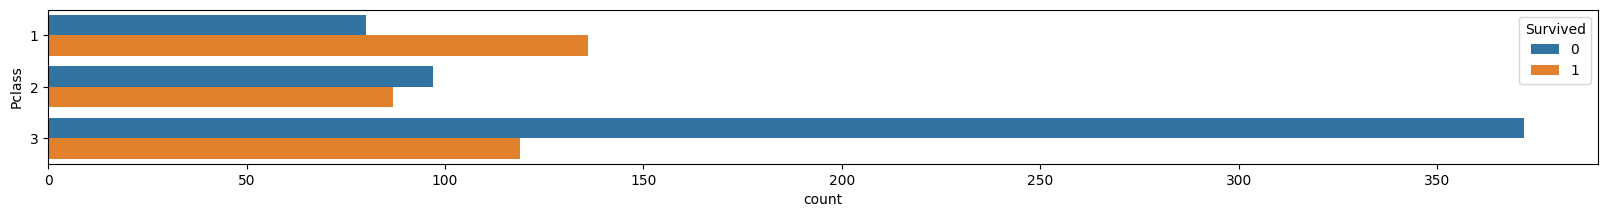

In [276]:
fig = plt.figure(figsize=(20,2))
ax = sns.countplot(y='Pclass', data=df, hue=df['Survived'])

#### Column: Sex

Man has much lower survival rate than woman did.

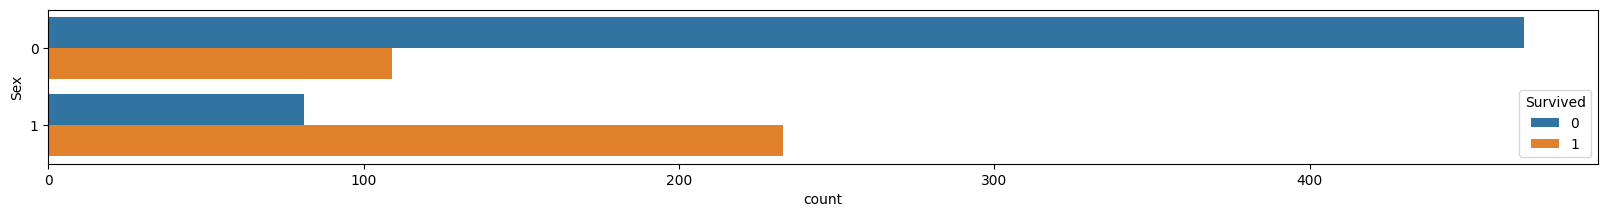

In [277]:
# Man value is 0, Woman value is 1
fig = plt.figure(figsize=(20,2))
sns.countplot(y='Sex', data=df, hue=df['Survived']);

#### Column: Age

Below shows Child group (age 0 - 9) has much higher survival rate.

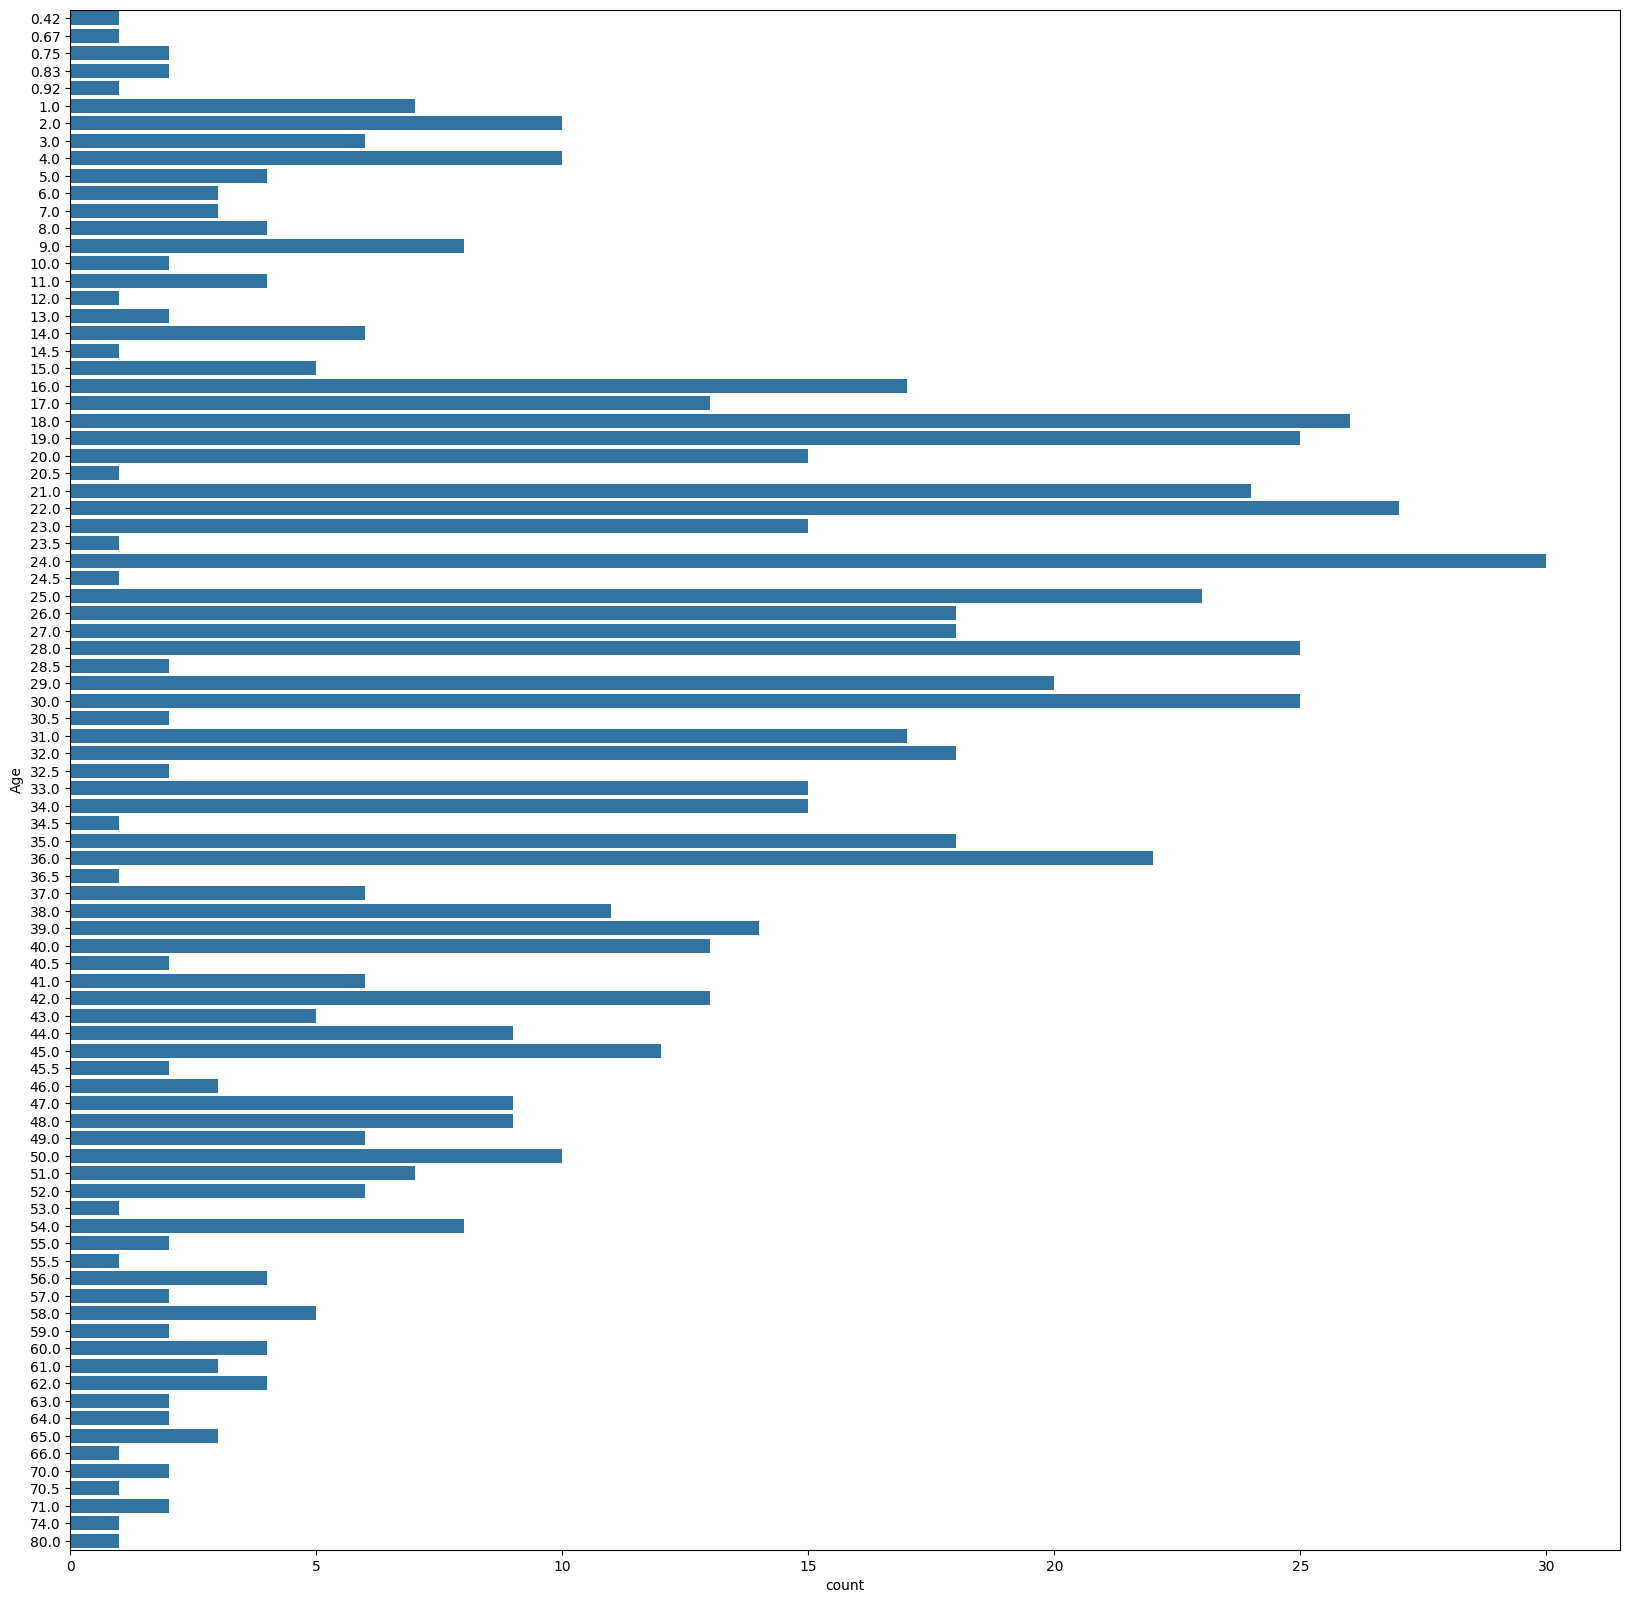

In [278]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df['Age'], data=df);

<Axes: xlabel='count', ylabel='Age_group'>

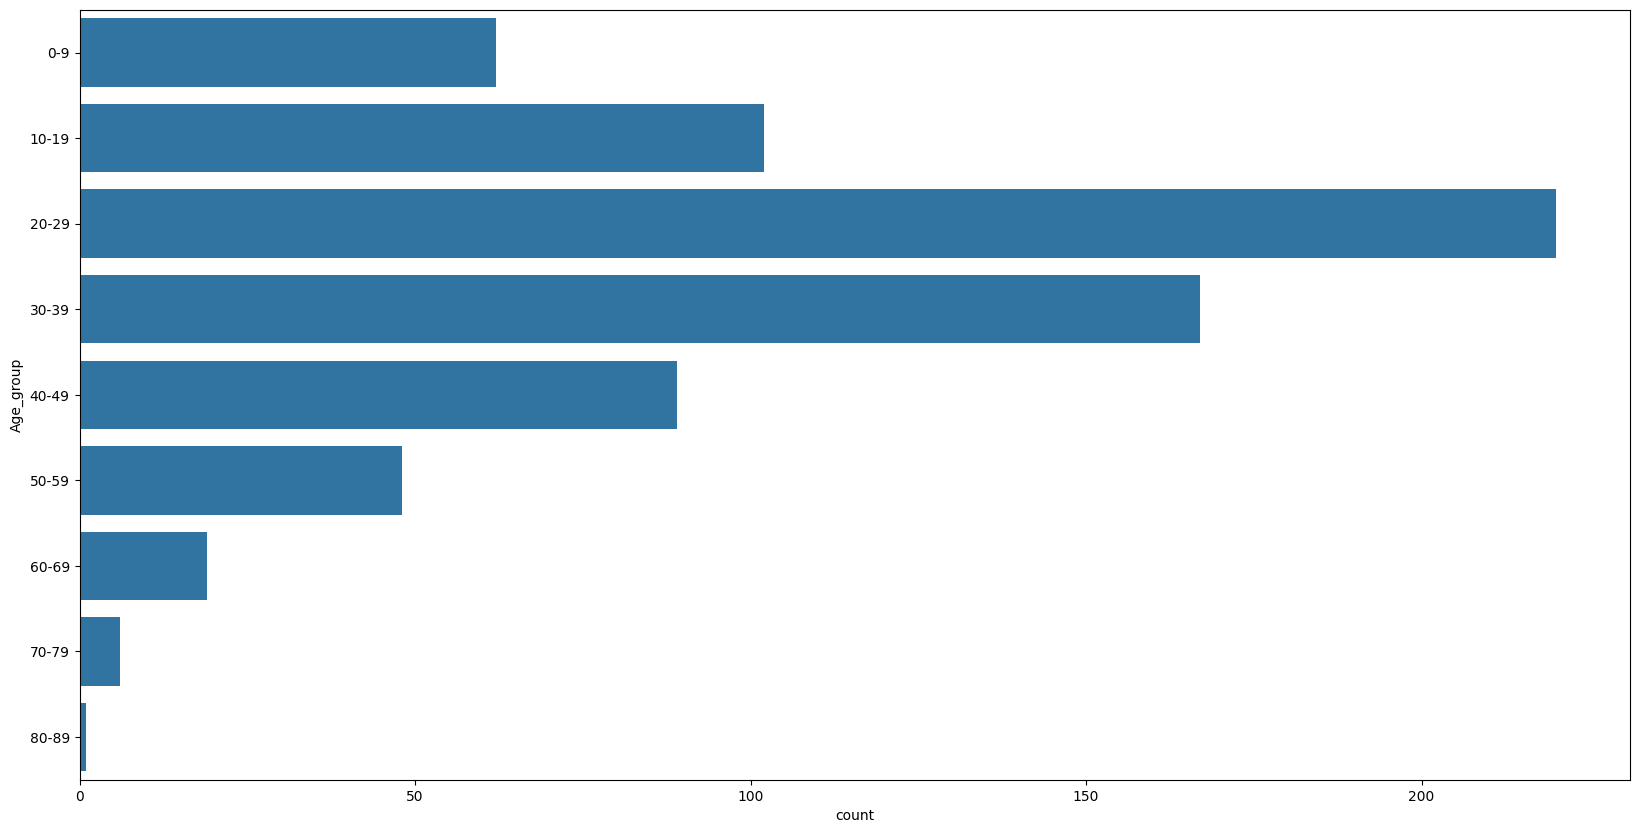

In [279]:
# Put age into group (by 10 years) for easier analysis
df['Age_group'] = pd.cut(df['Age'], [0,9,19,29,39,49,59,69,79,89], 
                   labels=['0-9','10-19','20-29','30-39','40-49','50-59',
                           '60-69','70-79','80-89'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df['Age_group'], data=df)

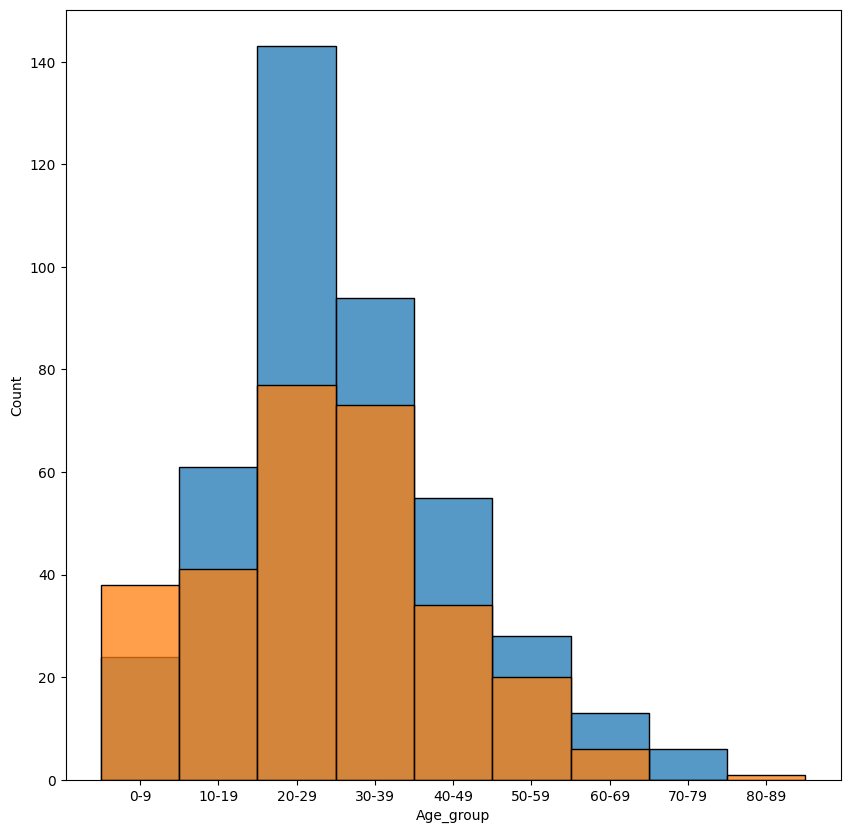

In [280]:
fig = plt.figure(figsize=(10, 10))

sns.histplot(df.loc[(df['Survived'] == 0)]['Age_group'], kde_kws={'label': 'Died'});
sns.histplot(df.loc[(df['Survived'] == 1)]['Age_group'], kde_kws={'label': 'Survived'});

#### Column: SibSp

Below shows passengers with 1 or 2 sibling has the highest survival rate, whereas passengers without sibling or with 3 or more sibling has lower survival rate.

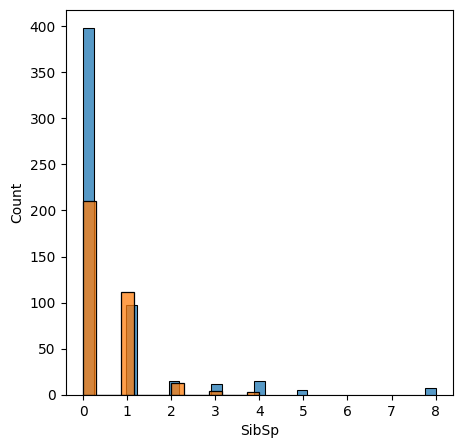

In [281]:
fig = plt.figure(figsize=(5, 5))

#sns.histplot(df.loc[(df['Age'] > 0) & (df['Age'] < 10)]['Survived'], kde_kws={'label': 'Age < 39'});

sns.histplot(df.loc[(df['Survived'] == 0)]['SibSp'], kde_kws={'label': 'Died'});
sns.histplot(df.loc[(df['Survived'] == 1)]['SibSp'], kde_kws={'label': 'Survived'});

#### Column: Parch

Below shows passengers with 1 or 2 parch has the highest survival rate.

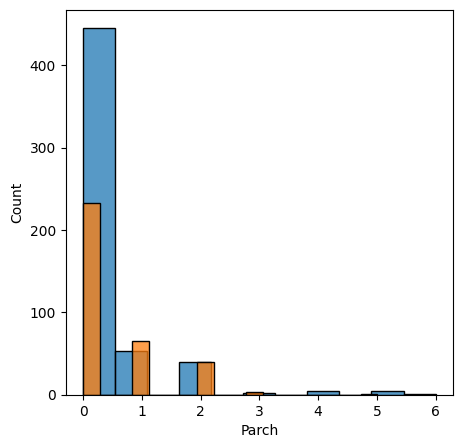

In [282]:
fig = plt.figure(figsize=(5, 5))

#sns.histplot(df.loc[(df['Age'] > 0) & (df['Age'] < 10)]['Survived'], kde_kws={'label': 'Age < 39'});

sns.histplot(df.loc[(df['Survived'] == 0)]['Parch'], kde_kws={'label': 'Died'});
sns.histplot(df.loc[(df['Survived'] == 1)]['Parch'], kde_kws={'label': 'Survived'});

#### Column: Fare

Below shows passengers paid cheapest fare range has the lowest survival rate, lower than the general survival rate.

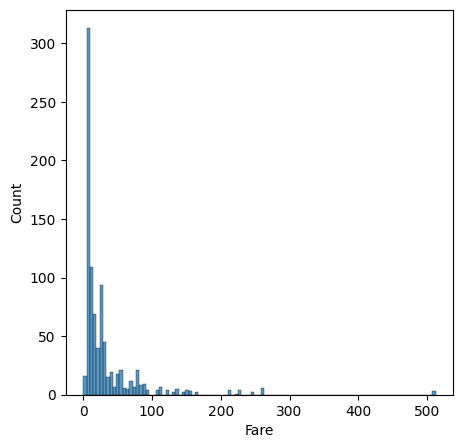

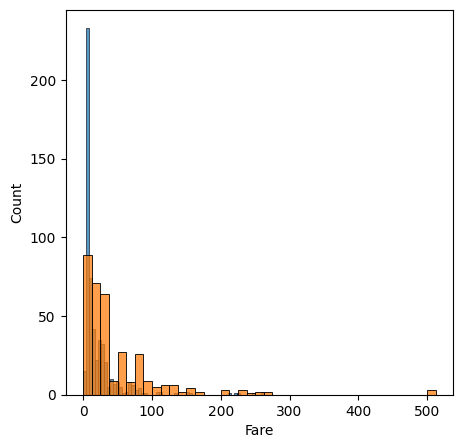

In [283]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(df['Fare'], kde_kws={'label': 'Died'})

fig = plt.figure(figsize=(5, 5))
sns.histplot(df.loc[(df['Survived'] == 0)]['Fare'], kde_kws={'label': 'Died'});
sns.histplot(df.loc[(df['Survived'] == 1)]['Fare'], kde_kws={'label': 'Survived'});

#### Column: Embarked

Below shows passengers embarked with value 'C' has much higher survival rate than other groups and general do.

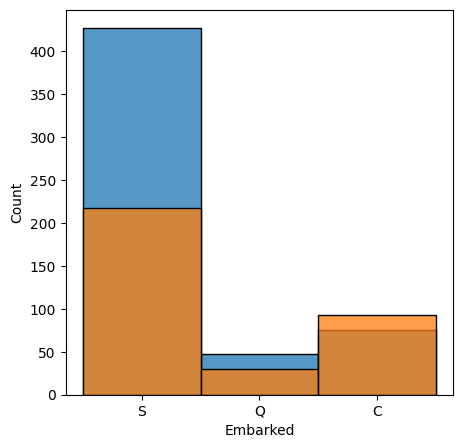

In [284]:
fig = plt.figure(figsize=(5, 5))

sns.histplot(df.loc[(df['Survived'] == 0)]['Embarked'], kde_kws={'label': 'Die'});
sns.histplot(df.loc[(df['Survived'] == 1)]['Embarked'], kde_kws={'label': 'Survived'});

### Try to find any correlations between columns

#### Study between Pclass and Sex
Below chart shows:
- Woman has higher survival rate than average rate 38%. Most of woman in Pclass 1 survived (survival rate 96%).
- Man of Pclass 1 has higher survival rate than average rate, but still lower that average rate.

   Sex  Pclass  sum  count  Survival_rate
0    0       1   45    122      36.885246
1    0       2   17    108      15.740741
2    0       3   47    347      13.544669
3    1       1   91     94      96.808511
4    1       2   70     76      92.105263
5    1       3   72    144      50.000000


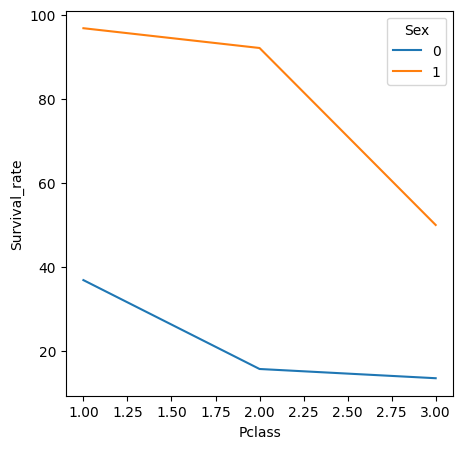

In [285]:
# fig = plt.figure(figsize=(5, 3))
# sns.histplot(data=df, x="Pclass", hue="Sex", multiple="dodge")

# fig = plt.figure(figsize=(5, 3))
# sns.histplot(data=df.loc[df['Survived'] == 1], x="Pclass", hue="Sex", multiple="dodge", element="step")
# plt.show()
# fig = plt.figure(figsize=(5, 3))
# sns.histplot(data=df.loc[df['Survived'] == 0], x="Pclass", hue="Sex", multiple="dodge", element="step")
# plt.show()

df_tmp = df.groupby(['Sex', 'Pclass']).agg({'Survived': ['sum','count']}).reset_index()
df_tmp = df_tmp.set_index(['Sex','Pclass'])['Survived'].reset_index()
df_tmp['Survival_rate'] = df_tmp['sum'] / df_tmp['count'] * 100

# df_tmp.columns = df_tmp.columns.droplevel(1)
print(df_tmp)

fig = plt.figure(figsize=(5, 5))
sns.lineplot(data=df_tmp, x="Pclass", y="Survival_rate", hue="Sex")
plt.show()


#### Study between SibSp and Sex
Below chart shows:
- Wwoman has similar survival rate if they have no sibling or 1-2 siblings.
- And man has slightly higher survival rate if they have 1 siblings.
- Both woman and man have less chance to live if they got more than 3 siblings. Probably they given up their space in lifeboats for their siblings.

Note: The data of siblings > 2 is relativly too small for conclusion. 

    Sex  SibSp  sum  count  Survival_rate
0     0      0   73    434      16.820276
1     0      1   32    103      31.067961
2     0      2    3     15      20.000000
3     0      3    0      5       0.000000
4     0      4    1     12       8.333333
5     0      5    0      4       0.000000
6     0      8    0      4       0.000000
7     1      0  137    174      78.735632
8     1      1   80    106      75.471698
9     1      2   10     13      76.923077
10    1      3    4     11      36.363636
11    1      4    2      6      33.333333
12    1      5    0      1       0.000000
13    1      8    0      3       0.000000


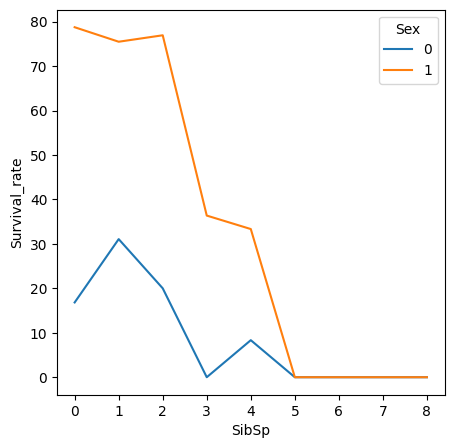

In [286]:
#Age_group Sex Survived	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked
df_tmp = df.groupby(['Sex', 'SibSp']).agg({'Survived': ['sum','count']}).reset_index()
df_tmp = df_tmp.set_index(['Sex','SibSp'])['Survived'].reset_index()
df_tmp['Survival_rate'] = df_tmp['sum'] / df_tmp['count'] * 100

# df_tmp.columns = df_tmp.columns.droplevel(1)
print(df_tmp)

fig = plt.figure(figsize=(5, 5))
sns.lineplot(data=df_tmp, x="SibSp", y="Survival_rate", hue="Sex")
plt.show()


#### Study between Parch and Sex
Below chart shows:
- Woman has less survival rate if they have no parch.
- But man has higher survival rate if they have 1 - 2 parch.
- But man still have generally low survival rate

Note: The data of parch > 2 is relativly too small for conclusion. 

    Sex  Parch  sum  count  Survival_rate
0     0      0   80    484      16.528926
1     0      1   19     58      32.758621
2     0      2   10     31      32.258065
3     0      3    0      1       0.000000
4     0      4    0      2       0.000000
5     0      5    0      1       0.000000
6     1      0  153    194      78.865979
7     1      1   46     60      76.666667
8     1      2   30     49      61.224490
9     1      3    3      4      75.000000
10    1      4    0      2       0.000000
11    1      5    1      4      25.000000
12    1      6    0      1       0.000000


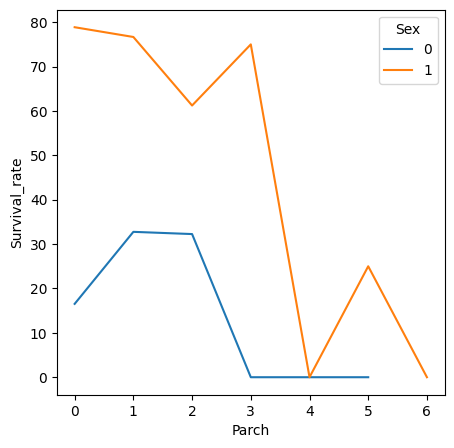

In [287]:
#Age_group Sex Survived	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked
df_tmp = df.groupby(['Sex', 'Parch']).agg({'Survived': ['sum','count']}).reset_index()
df_tmp = df_tmp.set_index(['Sex','Parch'])['Survived'].reset_index()
df_tmp['Survival_rate'] = df_tmp['sum'] / df_tmp['count'] * 100

# df_tmp.columns = df_tmp.columns.droplevel(1)
print(df_tmp)

fig = plt.figure(figsize=(5, 5))
sns.lineplot(data=df_tmp, x="Parch", y="Survival_rate", hue="Sex")
plt.show()

#### Study between Pclass and Age
Below charts show:
- The age disturbution in different Pclass is similar. There are lots of men in Pclass 3 between 20 -29.
- Children has highest survival rate. The survival rate is going down with age. But the rate surges in elderly group, but the data of that group is too small.

    Pclass Age_group  sum  count  Survival_rate
0        1       0-9    2      3      66.666667
1        1     10-19   15     18      83.333333
2        1     20-29   24     34      70.588235
3        1     30-39   39     50      78.000000
4        1     40-49   22     37      59.459459
5        1     50-59   15     27      55.555556
6        1     60-69    4     13      30.769231
7        1     70-79    0      3       0.000000
8        1     80-89    1      1     100.000000
9        2       0-9   17     17     100.000000
10       2     10-19    9     18      50.000000
11       2     20-29   22     53      41.509434
12       2     30-39   19     48      39.583333
13       2     40-49   10     18      55.555556
14       2     50-59    5     15      33.333333
15       2     60-69    1      3      33.333333
16       2     70-79    0      1       0.000000
17       2     80-89    0      0            NaN
18       3       0-9   19     42      45.238095
19       3     10-19   17     66      25

C:\Users\Mandy\AppData\Local\Temp\ipykernel_9972\3218642080.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df.groupby(['Pclass', 'Age_group']).agg({'Survived': ['sum','count']}).reset_index()


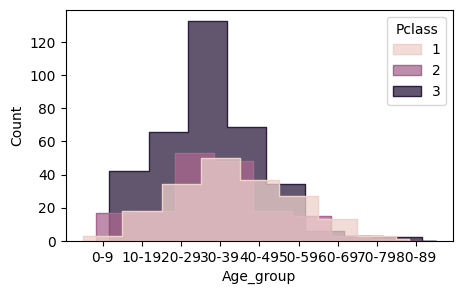

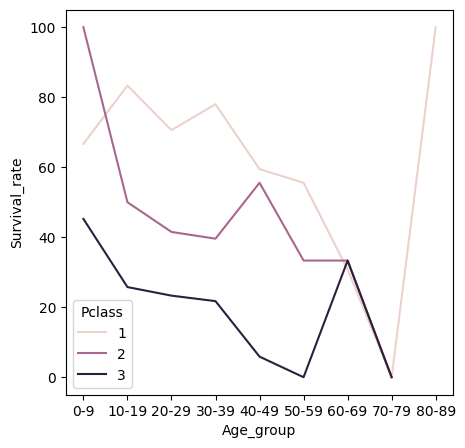

In [288]:
#Age_group Sex Survived	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked
fig = plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="Age_group", hue="Pclass", multiple="dodge", element="step")

df_tmp = df.groupby(['Pclass', 'Age_group']).agg({'Survived': ['sum','count']}).reset_index()
df_tmp = df_tmp.set_index(['Pclass','Age_group'])['Survived'].reset_index()
df_tmp['Survival_rate'] = df_tmp['sum'] / df_tmp['count'] * 100

# df_tmp.columns = df_tmp.columns.droplevel(1)
print(df_tmp)

fig = plt.figure(figsize=(5, 5))
sns.lineplot(data=df_tmp, x="Age_group", y="Survival_rate", hue="Pclass")
plt.show()

#### Study between Sex and Age
Below charts show:
- The age disturbution in different Sex is similar.
- The female passengers has higher survival rate in age 50 - 69.
- On the contrary, male passengers has higher survival rate if they are children. There is an exception of a old man aged 80-89 survived, which figure is too small.
- But chance of survival in all age groups of men is lower than that in any groups of woman.

    Sex Age_group  sum  count  Survival_rate
0     0       0-9   19     32      59.375000
1     0     10-19    7     57      12.280702
2     0     20-29   25    148      16.891892
3     0     30-39   23    107      21.495327
4     0     40-49   12     57      21.052632
5     0     50-59    4     30      13.333333
6     0     60-69    2     15      13.333333
7     0     70-79    0      6       0.000000
8     0     80-89    1      1     100.000000
9     1       0-9   19     30      63.333333
10    1     10-19   34     45      75.555556
11    1     20-29   52     72      72.222222
12    1     30-39   50     60      83.333333
13    1     40-49   22     32      68.750000
14    1     50-59   16     18      88.888889
15    1     60-69    4      4     100.000000
16    1     70-79    0      0            NaN
17    1     80-89    0      0            NaN


C:\Users\Mandy\AppData\Local\Temp\ipykernel_9972\608457448.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tmp = df.groupby(['Sex', 'Age_group']).agg({'Survived': ['sum','count']}).reset_index()


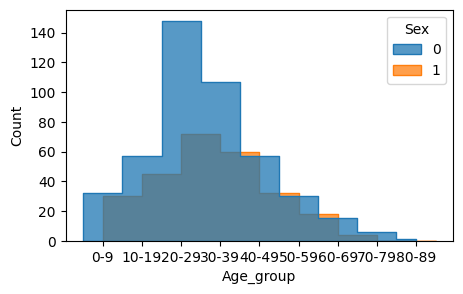

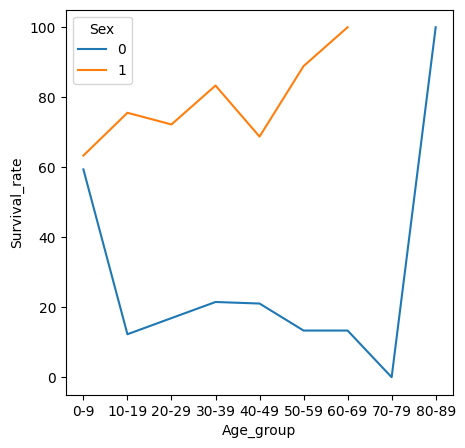

In [289]:
#Age_group Sex Survived	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked
fig = plt.figure(figsize=(5, 3))
sns.histplot(data=df, x="Age_group", hue="Sex", multiple="dodge", element="step")

df_tmp = df.groupby(['Sex', 'Age_group']).agg({'Survived': ['sum','count']}).reset_index()
df_tmp = df_tmp.set_index(['Sex','Age_group'])['Survived'].reset_index()
df_tmp['Survival_rate'] = df_tmp['sum'] / df_tmp['count'] * 100

# df_tmp.columns = df_tmp.columns.droplevel(1)
print(df_tmp)

fig = plt.figure(figsize=(5, 5))
sns.lineplot(data=df_tmp, x="Age_group", y="Survival_rate", hue="Sex")
plt.show()

###  Guiding questions for the EDA:

#### 1. What is the most important factor in determining survival of the Titanic incident?
The sex is the most important factor. Comparing survival rate in categories of all the factors, the survial rate of man is lower.  


#### 2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

Yes. The survival rate of Pclass 1 is highest, then Pclass 2. Pclass 3 has the lowest rate. The number of survival in Pclass 1 is highest than those in other class, even the number of people in Pclass 1 is much less than the number of people in Pclass 3. This is also revealed from the fare, that lowest fare group has lowest survival rate.


#### 3. “Women and children first”. Was this the case?

Yes. The survial rate of woman is highest than that of man. Also, survival rate of children aged between 0-9 is obviously much higher comparing with those in other age groups. This suggests priority to lifeboats were given to woman and children.


#### 4. Add one other observation that you have noted in the dataset.

The survival rate of passenger with 3 or more sibling, is lower than those with 1-2 or without any sibling. This could possibly be the reason that the group gave up their seats in lifeboats to their sibling when they have lots of siblings. 